First few rows of the dataset:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCm

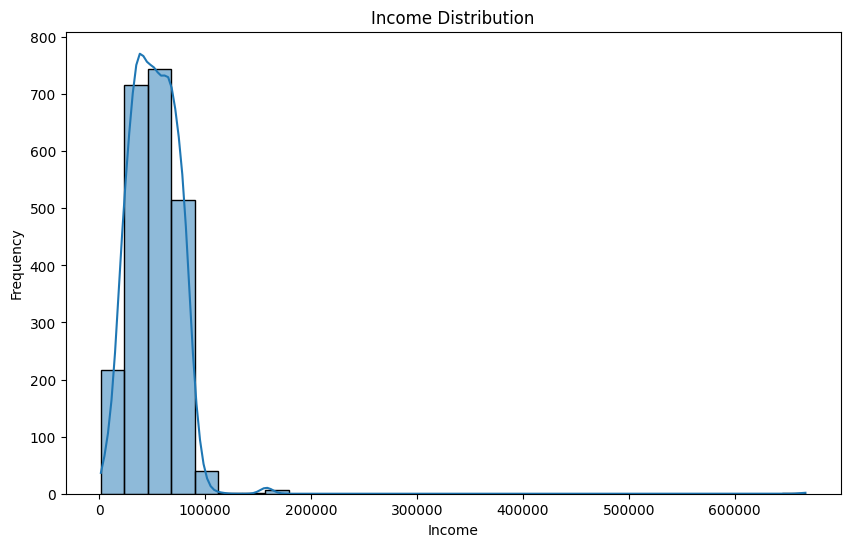

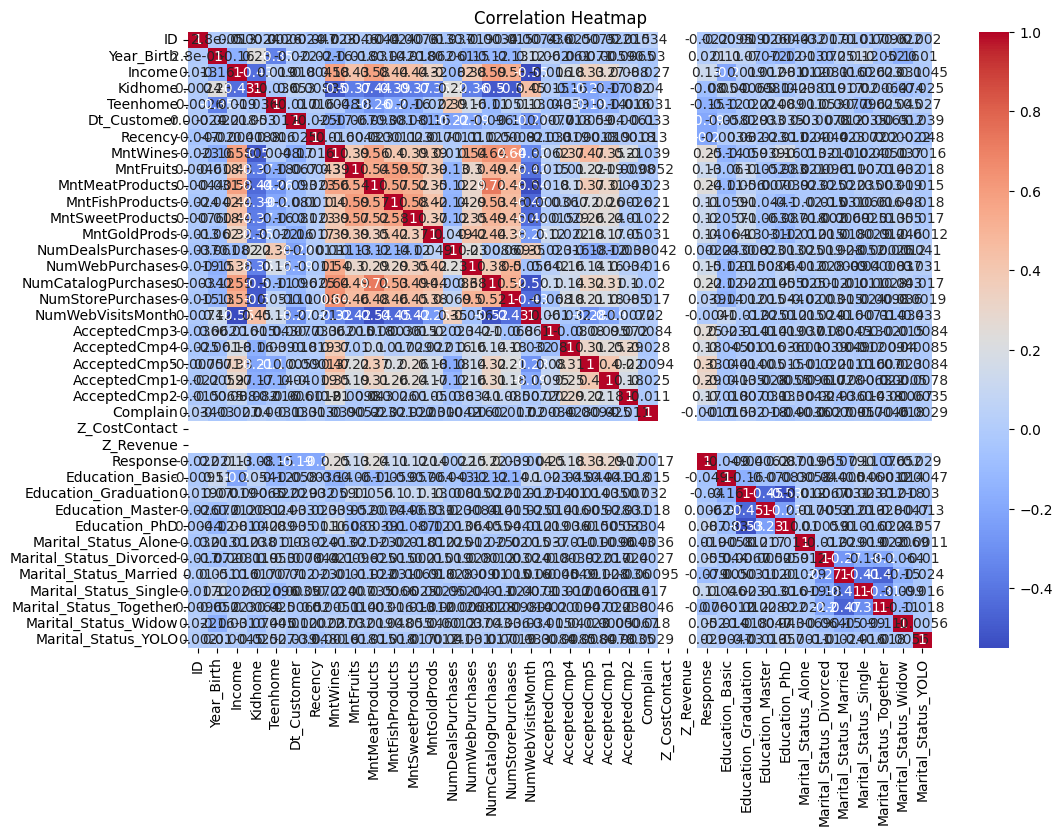

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


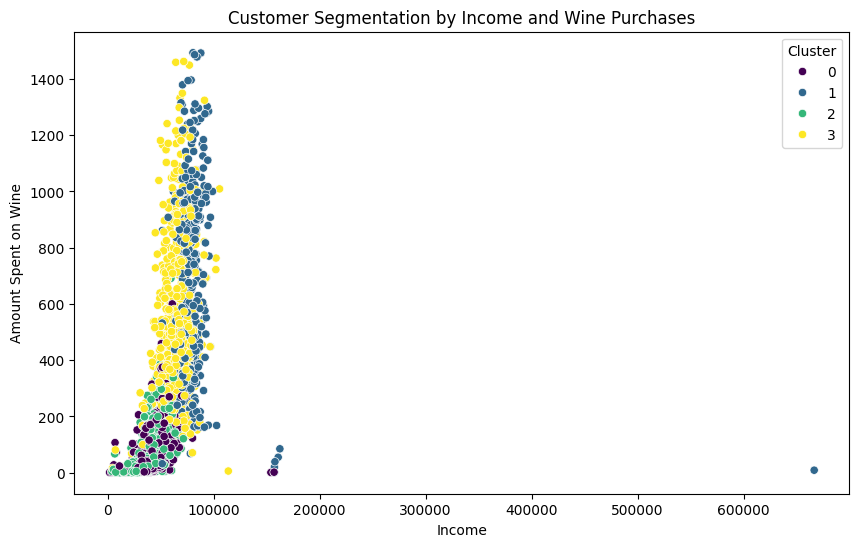


Percentage of customers who accepted at least one campaign: 20.67%


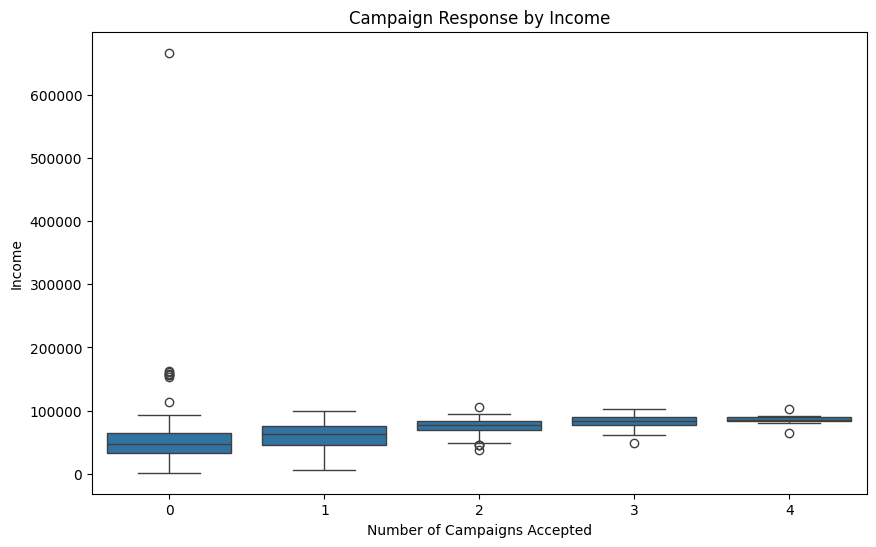

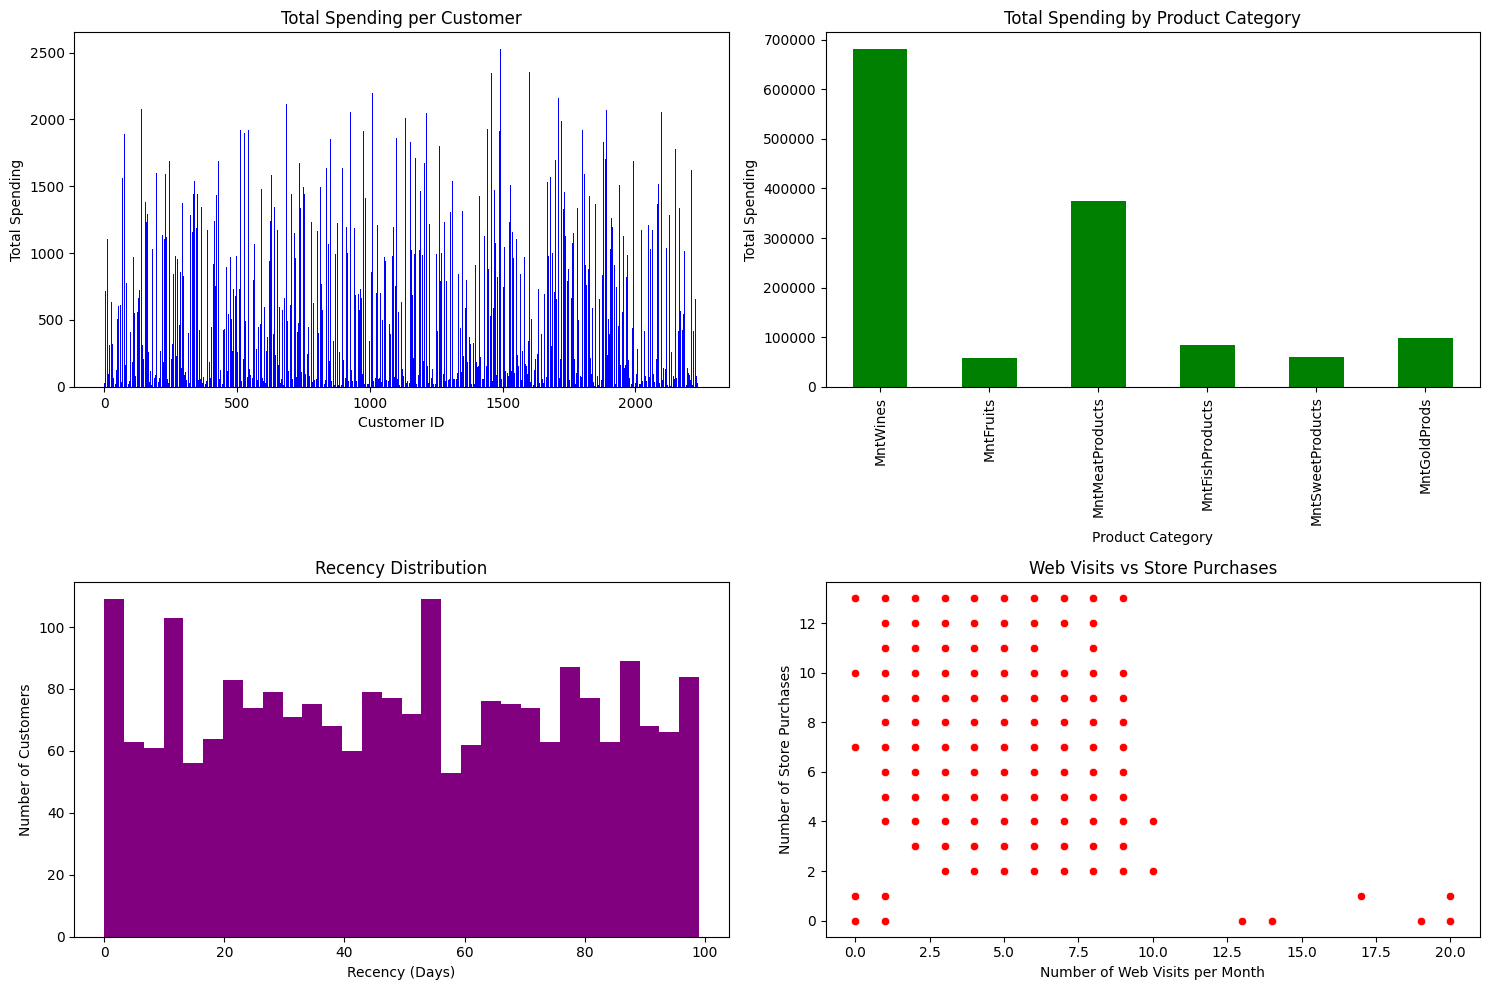


Key Insights from the Data:
1. 20.67% of customers accepted at least one campaign.
2. Customers are segmented into 4 clusters based on their income, recency, and purchasing behavior.
3. Total spending by customers is highest on wines, followed by meat products.
4. There is a positive correlation between income and spending on wine.
5. The number of web visits does not have a significant impact on store purchases based on the scatter plot.


In [17]:
# Importing python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading the dataset from the provided path with tab delimiter
file_path = '/content/marketing_campaign.csv'

# Try to load the data
try:
    df = pd.read_csv(file_path, delimiter='\t')
except Exception as e:
    print(f"Error loading the file: {e}")

# Strip any leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# Checking the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Checking the columns of the DataFrame
print("Columns in the DataFrame:")
print(df.columns)

# Converting 'Dt_Customer' to datetime if it exists
if 'Dt_Customer' in df.columns:
    try:
        df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')  # Adjust format if necessary
    except Exception as e:
        print(f"Error converting 'Dt_Customer' to datetime: {e}")
else:
    print("'Dt_Customer' column is missing.")

# Filling missing values with the median for numeric columns only
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Converting categorical columns like 'Education' and 'Marital_Status' to dummy variables
categorical_cols = ['Education', 'Marital_Status']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Displaying the summary statistics of the numerical columns
print("\nSummary statistics of the dataset:")
print(df.describe())

# Visualizing the distribution of 'Income'
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Visualizing the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Performing clustering (KMeans) on customers using selected features
features = ['Income', 'Recency', 'MntWines', 'MntMeatProducts', 'NumWebPurchases']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing the customer segmentation based on Income and MntWines
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='MntWines', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation by Income and Wine Purchases')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Wine')
plt.show()

# Analyzing the campaign response (AcceptedCmp1 to AcceptedCmp5)
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['TotalCampaignAccepted'] = df[campaign_cols].sum(axis=1)

# Calculating and display the percentage of customers who accepted at least one campaign
response_rate = (df['TotalCampaignAccepted'] > 0).mean() * 100
print(f"\nPercentage of customers who accepted at least one campaign: {response_rate:.2f}%")

# Visualizing the distribution of campaign responses by income
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TotalCampaignAccepted', y='Income')
plt.title('Campaign Response by Income')
plt.xlabel('Number of Campaigns Accepted')
plt.ylabel('Income')
plt.show()

# Creating a dashboard-style visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Total Spending per Customer
df['TotalSpending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
axes[0, 0].bar(df.index, df['TotalSpending'], color='blue')
axes[0, 0].set_title('Total Spending per Customer')
axes[0, 0].set_xlabel('Customer ID')
axes[0, 0].set_ylabel('Total Spending')

# Plot 2: Spending Distribution by Product Category
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df[product_cols].sum().plot(kind='bar', ax=axes[0, 1], color='green')
axes[0, 1].set_title('Total Spending by Product Category')
axes[0, 1].set_xlabel('Product Category')
axes[0, 1].set_ylabel('Total Spending')

# Plot 3: Recency Distribution
axes[1, 0].hist(df['Recency'], bins=30, color='purple')
axes[1, 0].set_title('Recency Distribution')
axes[1, 0].set_xlabel('Recency (Days)')
axes[1, 0].set_ylabel('Number of Customers')

# Plot 4: Web Visits vs Store Purchases
sns.scatterplot(data=df, x='NumWebVisitsMonth', y='NumStorePurchases', ax=axes[1, 1], color='red')
axes[1, 1].set_title('Web Visits vs Store Purchases')
axes[1, 1].set_xlabel('Number of Web Visits per Month')
axes[1, 1].set_ylabel('Number of Store Purchases')

plt.tight_layout()
plt.show()

# Displaying insights summary
print("\nKey Insights from the Data:")
print(f"1. {response_rate:.2f}% of customers accepted at least one campaign.")
print("2. Customers are segmented into 4 clusters based on their income, recency, and purchasing behavior.")
print("3. Total spending by customers is highest on wines, followed by meat products.")
print("4. There is a positive correlation between income and spending on wine.")
print("5. The number of web visits does not have a significant impact on store purchases based on the scatter plot.")

